The Night Owls

Course Project - Milestone 4

DSC630: Predictive Analytics

02/09/2025

---

Python Version: 3.12

Libraries:

- Pandas: 2.2.2
- Numpy: 2.0.0
- Matplotlib: 3.9.0
- Seaborn: 0.13.2
- Scikit-Learn: 1.5.1
- Statsmodels: 0.14.2

# 1. <a id='toc1_'></a>[Python Environment Setup](#toc0_)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline


import statsmodels.api as sm

**Table of contents**<a id='toc0_'></a>    
- 1. [Python Environment Setup](#toc1_)    
- 2. [Milestone Two](#toc2_)    
  - 2.1. [Introduction](#toc2_1_)    
    - 2.1.1. [Problem Statement and Interested Parties](#toc2_1_1_)    
    - 2.1.2. [Importance](#toc2_1_2_)    
    - 2.1.3. [Source](#toc2_1_3_)    
    - 2.1.4. [Usefulness](#toc2_1_4_)    
  - 2.2. [Proposal](#toc2_2_)    
    - 2.2.1. [Models](#toc2_2_1_)    
    - 2.2.2. [Evaluation](#toc2_2_2_)    
    - 2.2.3. [Lesson Learned](#toc2_2_3_)    
    - 2.2.4. [Concerns](#toc2_2_4_)    
    - 2.2.5. [Contingency](#toc2_2_5_)    
    - 2.2.6. [Additional Information](#toc2_2_6_)    
- 3. [Milestone Three](#toc3_)    
  - 3.1. [Exploratory Data Analysis](#toc3_1_)    
    - 3.1.1. [Data Loading](#toc3_1_1_)    
    - 3.1.2. [Data Cleaning](#toc3_1_2_)    
      - 3.1.2.1. [Description of Data](#toc3_1_2_1_)    
      - 3.1.2.2. [Check Data Cleanliness](#toc3_1_2_2_)    
      - 3.1.2.3. [Findings](#toc3_1_2_3_)    
    - 3.1.3. [Data Analysis](#toc3_1_3_)    
      - 3.1.3.1. [Summary Statistics](#toc3_1_3_1_)    
      - 3.1.3.2. [Data Visualization](#toc3_1_3_2_)    
        - 3.1.3.2.1. [Correlation Matrix](#toc3_1_3_2_1_)    
          - 3.1.3.2.1.1. [Findings](#toc3_1_3_2_1_1_)    
        - 3.1.3.2.2. [Histograms and Boxplots](#toc3_1_3_2_2_)    
      - 3.1.3.3. [Key Findings](#toc3_1_3_3_)    
  - 3.2. [Reflection on EDA](#toc3_2_)    
    - 3.2.1. [Will we be able to answer the questions we want to answer with the data we have?](#toc3_2_1_)    
    - 3.2.2. [What visualizations are especially useful for explaining my data?](#toc3_2_2_)    
    - 3.2.3. [Do we need to adjust the data and/or driving questions?](#toc3_2_3_)    
    - 3.2.4. [Do we need to adjust our model/evaluation choices?](#toc3_2_4_)    
    - 3.2.5. [Are our original expectations still reasonable?](#toc3_2_5_)    
- 4. [Milestone Four](#toc4_)    
  - 4.1. [Data Preparation](#toc4_1_)    
    - 4.1.1. [Data Cleaning](#toc4_1_1_)    
    - 4.1.2. [Data Splitting for Training](#toc4_1_2_)    
  - 4.2. [Models](#toc4_2_)    
    - 4.2.1. [Linear Regression Model](#toc4_2_1_)    
      - 4.2.1.1. [Train the model](#toc4_2_1_1_)    
      - 4.2.1.2. [Evaluate the Model](#toc4_2_1_2_)    
      - 4.2.1.3. [Findings](#toc4_2_1_3_)    
    - 4.2.2. [Stepwise Regression](#toc4_2_2_)    
      - 4.2.2.1. [Create the Feature Selection Function](#toc4_2_2_1_)    
      - 4.2.2.2. [Train the Model](#toc4_2_2_2_)    
      - 4.2.2.3. [Evaluate the Model](#toc4_2_2_3_)    
      - 4.2.2.4. [Findings](#toc4_2_2_4_)    
    - 4.2.3. [Random Forest Model](#toc4_2_3_)    
      - 4.2.3.1. [Train the Model](#toc4_2_3_1_)    
      - 4.2.3.2. [Evaluate the Model](#toc4_2_3_2_)    
      - 4.2.3.3. [Findings](#toc4_2_3_3_)    
    - 4.2.4. [Polynomial Regression](#toc4_2_4_)    
      - 4.2.4.1. [Train the Model](#toc4_2_4_1_)    
      - 4.2.4.2. [Evaluate the Model](#toc4_2_4_2_)    
      - 4.2.4.3. [Findings](#toc4_2_4_3_)    
    - 4.2.5. [Model Findings](#toc4_2_5_)    
  - 4.3. [Recommendations](#toc4_3_)    
    - 4.3.1. [Most Important Player Performance Metrics](#toc4_3_1_)    
      - 4.3.1.1. [Random Forest Recommendations](#toc4_3_1_1_)    
      - 4.3.1.2. [Stepwise Regression Recommendations](#toc4_3_1_2_)    
  - 4.4. [Conclusion](#toc4_4_)    
  - 4.5. [Additional Information](#toc4_5_)    
    - 4.5.1. [Project Ethical Considerations](#toc4_5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[Milestone Two](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Introduction](#toc0_)

### 2.1.1. <a id='toc2_1_1_'></a>[Problem Statement and Interested Parties](#toc0_)

In this report we want to explore the relationship between performance metrics and salary in Major League Baseball (MLB). Our dataset contains detailed player statistics and salary information, so our goal is to identify which performance factors most strongly influence salary outcomes. We will analyze the data to uncover trends and other causal factors that will give us insight into how player performance correlates to financial compensation. Our report will be valuable to teams, agents, and the players in understanding the factors that affect financial dynamics in the MLB.

### 2.1.2. <a id='toc2_1_2_'></a>[Importance](#toc0_)

Understanding the factors that impact a player’s salary in Major League Baseball (MLB) is pivotable for multiple stakeholders. For teams, assists in making decisions for efficient allocation of resources and helps ensure competitive balance. For players and their agents, it is critical to know the most valuable performance metrics to assist in contract negotiations and additionally in professional growth. These dynamics will clarify how sports organizations value talent and illuminate the decision-making process. This study is compelling as data-driven decisions are increasingly shaping professional sports.

### 2.1.3. <a id='toc2_1_3_'></a>[Source](#toc0_)

The dataset used for this analysis was sourced from Kaggle, a web platform that is a community for data scientists and machine learning professionals. Here is the link to our dataset: [(The Most Cost-Effective MLB Hitters)](https://www.kaggle.com/datasets/thedevastator/uncovering-the-most-cost-effective-mlb-hitters-o). Kaggle provides access to a wide range of publicly available datasets, including sports statistics, making it an invaluable resource. The MLB dataset utilized here includes comprehensive player statistics and salary information, enabling a thorough investigation of the association between key performance indicators and financial compensation.

### 2.1.4. <a id='toc2_1_4_'></a>[Usefulness](#toc0_)

This dataset is ideal for solving the problem because it includes detailed player performance metrics along with their salaries. Key statistics like home runs, runs batted in, and stolen bases allow us to analyze how various aspects of a player's performance influence their pay. With data spanning multiple seasons and teams, the dataset provides a broad and reliable foundation for uncovering patterns and identifying which factors have the biggest impact on MLB salaries.

## 2.2. <a id='toc2_2_'></a>[Proposal](#toc0_)

### 2.2.1. <a id='toc2_2_1_'></a>[Models](#toc0_)

We will attempt a combination of modeling approaches.

1. Linear regression will serve as a starting point, offering a simple and interpretable framework to quantify how individual performance factors, such as home runs or RBIs, affect salary.
2. Next, we will use a stepwise regression to refine the analysis by systematically selecting the most significant predictors, ensuring the model remains efficient and focused.
3. For more complex relationships, decision trees and random forests may be used to uncover non-linear patterns and interactions between variables, with random forests providing variable importance scores to highlight the most influential metrics.
4. Finally, we may use forecasting models by predicting future salaries based on historical trends and projected performance metrics.

Together, these methods provide a powerful toolkit for understanding and predicting the impact on the salaries of MLB players.

### 2.2.2. <a id='toc2_2_2_'></a>[Evaluation](#toc0_)

Due to the nature of our research, we will be interested in ensuring that the model's performance is as good as it can be. In addition to building our models, we also plan to rigorously assess and evaluate the performance of our model(s). To ensure we have a good balance between test and training data, we will use the Scikit Learn library’s train_test_split() function with 80% of the data allocated for training and 20% allocated for testing. Metrics that will be important are accuracy of the regression models (accuracy of testing), error rates (MSE, RMSE, MEA, MAPE), and variance coverage (R2, COD). To ensure the best results, hyperparameter tuning might be required and the use of scalars to normalize the data.

### 2.2.3. <a id='toc2_2_3_'></a>[Lesson Learned](#toc0_)

We hope to reveal all the metrics that most significantly influence a player’s salary and understand the impact on decisions that go into establishing capital budgeting decisions. Linear and stepwise regression will help us pinpoint the most relevant predictors and their importance; decision tress and random forests will drive our exploration into non-linear correlations and interactions amongst these metrics to understand the combined effects. Forecasting models will help in predicting future salary trends from historical patterns and anticipated performance.

### 2.2.4. <a id='toc2_2_4_'></a>[Concerns](#toc0_)

Some of the normal risks of this type of report include oversimplifying the factors influencing salaries because there are many non-performance-related issues that are factors. Things like market conditions, team budgets, and player popularity. Ethical concerns in this type of analysis may find that potential misuse of findings of team dynamics are less quantifiable and perpetuate biases in salary decisions. Also, there is a concern for breach of privacy as sensitive data about players is included in the analysis. We certainly plan to manage this data responsibly to ensure that our findings are objectively presented and promote fair interpretation and evaluation.

### 2.2.5. <a id='toc2_2_5_'></a>[Contingency](#toc0_)

In case our models discover that salaries do not correlate to actual player metrics, we plan to use an additional dataset that contains the popularity of current baseball players, and with a script, pull the lifetime metrics for those players. With the added datasets, we anticipate the discovery of additional variables that can correlate with player salaries.

### 2.2.6. <a id='toc2_2_6_'></a>[Additional Information](#toc0_)

We will also take model validation and testing into account as it is essential to ensure that the findings are solidly built, broad based, and not overly influenced by any peculiarities in the dataset.

# 3. <a id='toc3_'></a>[Milestone Three](#toc0_)

## 3.1. <a id='toc3_1_'></a>[Exploratory Data Analysis](#toc0_)

### 3.1.1. <a id='toc3_1_1_'></a>[Data Loading](#toc0_)

In [2]:
# Load in the data
data = pd.read_csv("./MLBStats.csv")

# Display data head
data.head()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,...,0,0,0,0,300000,0,0,0,0,0
1,1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,...,0,0,0,0,387500,0,0,0,0,0
2,2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,...,0,0,0,1,403250,0,0,0,0,1
3,3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,...,0,0,0,0,419000,0,0,0,0,0
4,4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,...,0,0,0,0,500000,0,0,0,0,0


### 3.1.2. <a id='toc3_1_2_'></a>[Data Cleaning](#toc0_)

#### 3.1.2.1. <a id='toc3_1_2_1_'></a>[Description of Data](#toc0_)

Field Details
- Player Name: Name of the player. (String)
- weight: Weight of the player in pounds. (Integer)
- height: Height of the player in inches. (Integer)
- height: Height of the player in inches. (Integer)
- bats: Handedness when batting. (String)
- throws: Handedness when throwing. (String)
- Season: Year of the season. (Integer)
- League: American or National League team. (String)
- Team: Name of the MLB team. (String)
- Franchise: Name of the franchise that owns the team. (String)
- G: Number of games played by the player during the season. (Integer)
- AB: Number of at-bats by the player during the season. (Integer)
- R: Number of runs scored by the player during the season. (Integer)
- 2B: Number of doubles hit by the player during the season. (Integer)
- 3B: Number of triples hit by the player during the season. (Integer)
- HR: Number of home runs hit by the player during the season. (Integer)
- RBI: Number of runs batted in by the player during the season. (Integer)
- SB: Number of stolen bases by the player during the season. (Integer)
- BB: Number of walks issued to the player during the season. (Integer)
- SO: Number of strikeouts by the player during the season. (Integer)
- IBB: Intentional Base on Balls or Intentional Walk Issued Around Plate Umpire. (Integer)
- HBP: Hit Batsman Upon At-Bat. (Integer)
- SH: Sacrifice fly caught and recorded during respective ball game. (Integer)
- SF: Total number of Sacrifice Flies done thus far. (Integer)
- PA: Number Of Platements Participated over Entire Game Duration. (Integer)

In [3]:
# Display data shape
row_count, col_count = data.shape

print(f"Rows: {row_count}, Columns: {col_count}")

Rows: 28293, Columns: 29


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        28293 non-null  int64 
 1   playerID     28293 non-null  object
 2   Player Name  28293 non-null  object
 3   weight       28293 non-null  int64 
 4   height       28293 non-null  int64 
 5   bats         28293 non-null  object
 6   throws       28293 non-null  object
 7   Season       28293 non-null  int64 
 8   League       28293 non-null  object
 9   teamID       28293 non-null  object
 10  Team         28293 non-null  object
 11  Franchise    28293 non-null  object
 12  G            28293 non-null  int64 
 13  AB           28293 non-null  int64 
 14  R            28293 non-null  int64 
 15  H            28293 non-null  int64 
 16  2B           28293 non-null  int64 
 17  3B           28293 non-null  int64 
 18  HR           28293 non-null  int64 
 19  RBI          28293 non-nu

#### 3.1.2.2. <a id='toc3_1_2_2_'></a>[Check Data Cleanliness](#toc0_)

In [5]:
# Confirm data null and na counts
data.isnull().sum(), data.isna().sum()

(index          0
 playerID       0
 Player Name    0
 weight         0
 height         0
 bats           0
 throws         0
 Season         0
 League         0
 teamID         0
 Team           0
 Franchise      0
 G              0
 AB             0
 R              0
 H              0
 2B             0
 3B             0
 HR             0
 RBI            0
 SB             0
 BB             0
 SO             0
 salary         0
 IBB            0
 HBP            0
 SH             0
 SF             0
 PA             0
 dtype: int64,
 index          0
 playerID       0
 Player Name    0
 weight         0
 height         0
 bats           0
 throws         0
 Season         0
 League         0
 teamID         0
 Team           0
 Franchise      0
 G              0
 AB             0
 R              0
 H              0
 2B             0
 3B             0
 HR             0
 RBI            0
 SB             0
 BB             0
 SO             0
 salary         0
 IBB            0
 HBP         

In [6]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

#### 3.1.2.3. <a id='toc3_1_2_3_'></a>[Findings](#toc0_)

The dataset has no missing data or duplicates and is very clean.

### 3.1.3. <a id='toc3_1_3_'></a>[Data Analysis](#toc0_)

#### 3.1.3.1. <a id='toc3_1_3_1_'></a>[Summary Statistics](#toc0_)

In [7]:
# Display summary statistics
data.describe()

,index,weight,height,Season,G,AB,R,H,2B,3B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,...,28293.000000,28293.000000,28293.000000,28293.000000,2.829300e+04,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14146.000000,199.049305,73.500194,2000.938183,63.933871,161.879900,21.786838,42.624536,8.220655,0.909165,...,20.783763,3.107518,15.801718,30.376241,2.112965e+06,1.326052,1.450642,1.534549,1.366911,183.359771
std,8167.629919,22.653983,2.286595,8.900551,47.285257,199.406647,30.133899,56.200911,11.401446,1.832408,...,29.704822,7.494805,23.036362,37.624155,3.440239e+06,3.160607,2.782354,2.748349,2.207801,226.217383
min,0.000000,140.000000,66.000000,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.090000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7073.000000,185.000000,72.000000,1994.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14146.000000,195.000000,74.000000,2001.000000,50.000000,57.000000,4.000000,10.000000,2.000000,0.000000,...,4.000000,0.000000,3.000000,15.000000,6.000000e+05,0.000000,0.000000,0.000000,0.000000,66.000000
75%,21219.000000,215.000000,75.000000,2009.000000,101.000000,298.000000,37.000000,76.000000,14.000000,1.000000,...,34.000000,2.000000,25.000000,50.000000,2.425000e+06,1.000000,2.000000,2.000000,2.000000,337.000000
max,28292.000000,315.000000,83.000000,2016.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,...,165.000000,110.000000,232.000000,223.000000,3.300000e+07,120.000000,35.000000,39.000000,17.000000,783.000000


#### 3.1.3.2. <a id='toc3_1_3_2_'></a>[Data Visualization](#toc0_)

##### 3.1.3.2.1. <a id='toc3_1_3_2_1_'></a>[Correlation Matrix](#toc0_)
Analyze correlations between numerical features to identify key relationships that impact salary.

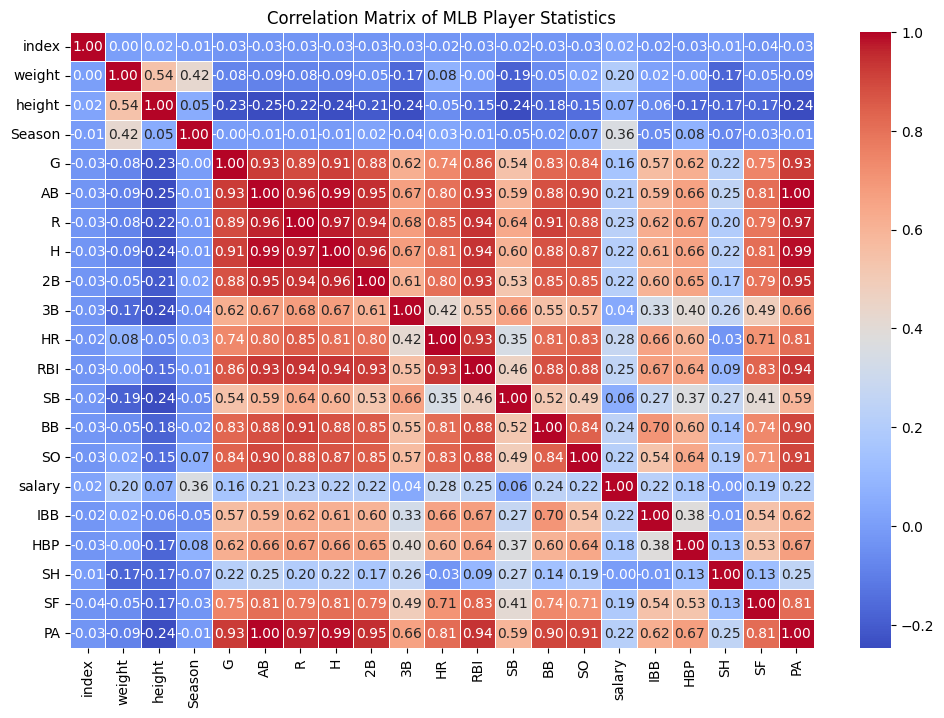

In [8]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of MLB Player Statistics')
plt.show()

###### 3.1.3.2.1.1. <a id='toc3_1_3_2_1_1_'></a>[Findings](#toc0_)

- Salary has a weak positive correlation with HR, RBI, and AB, suggesting that while performance impacts salary, it is not the sole determinant.  
- Salary has a weak positive correlation with BB and SO, indicating that better batting discipline tends to earn more but is not the sole factor.  
- Salary has a moderate correlation with Season. This might be an upward trend in salaries over time or possibly indicating that more experienced players tend to earn higher salaries.  
- Salary has a weak positive correlation with Weight and Height, indicating that physical attributes alone do not significantly impact earnings.  
- Salary has a weak positive correlation with G and PA, suggesting that players with more playing time tend to accumulate higher earnings.  
- Salary has a weak positive correlation with SB, indicating that base-running ability alone does not significantly impact earnings.  
- Salary has little to no correlation with SH and SF, suggesting that situational plays do not play a major role in salary determination.  
- Salary has a weak positive correlation with IBB, suggesting that while being intentionally walked may indicate a strong hitter, it does not strongly impact earnings.  

Although all positive relationships with Salary are weak, the relationships are still significant in our context. There are multiple factors that effect the Salary of a player, and the positivity of the performance statistics are evidence of player performance playing a role in salary determination. However, as they are not the sole factors, and there multiple external factors (such as team budgets, contract negotiations, marketability, and positional values) that play a role in determining player salaries, the positive correlations are on the weaker side.

##### 3.1.3.2.2. <a id='toc3_1_3_2_2_'></a>[Histograms and Boxplots](#toc0_)
Visualize the distribution of numerical variables using histograms and detect outliers using boxplots.

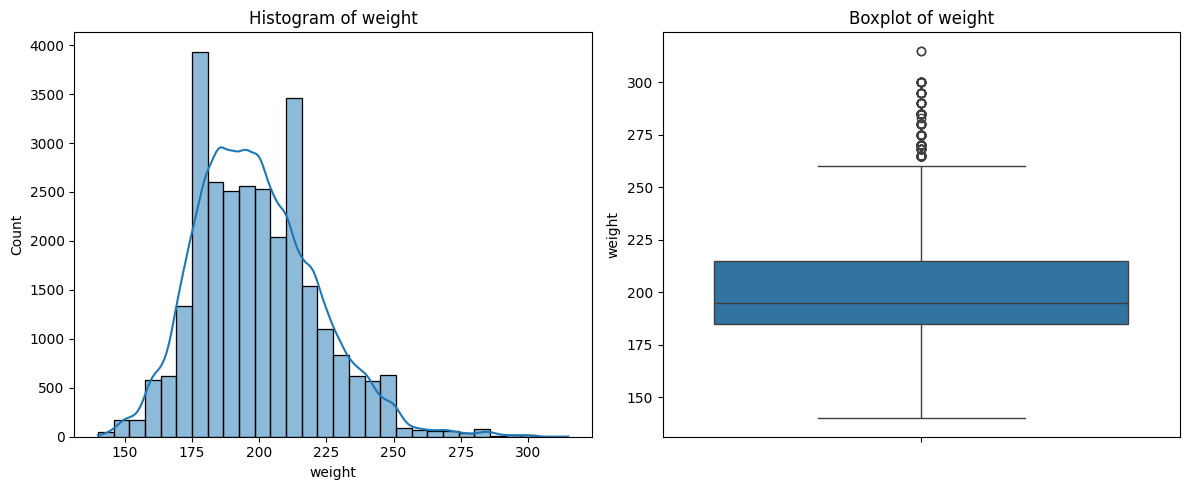

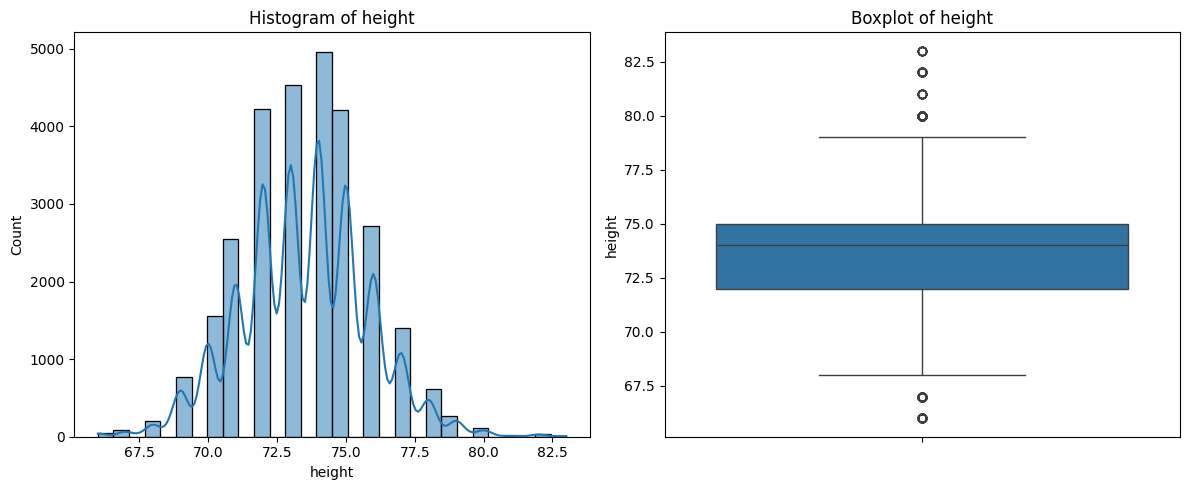

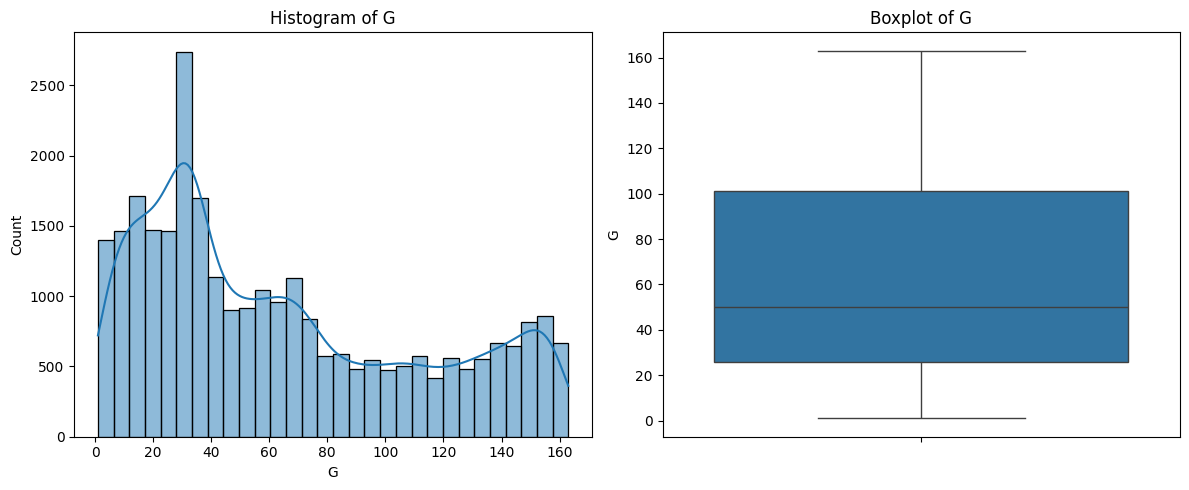

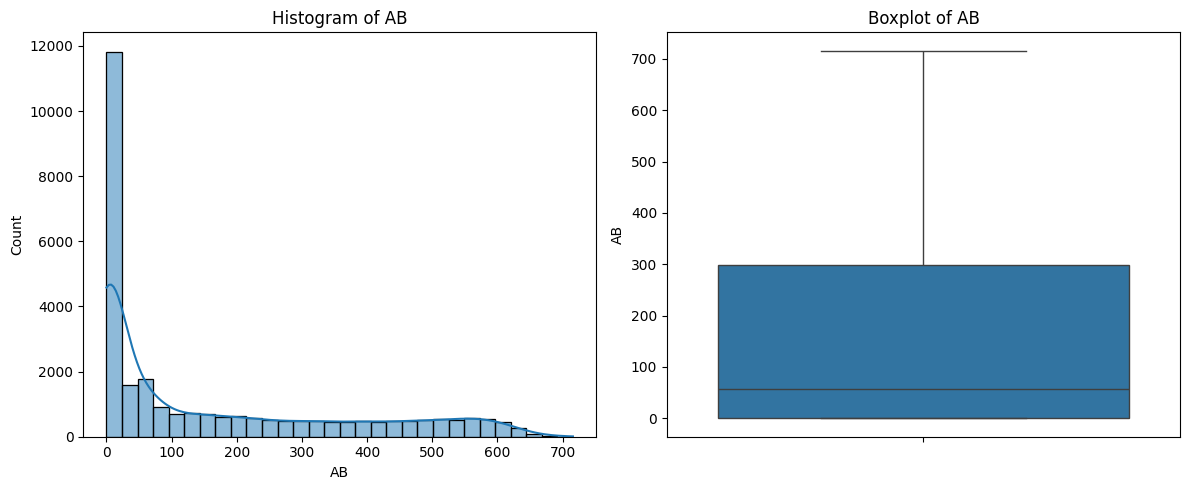

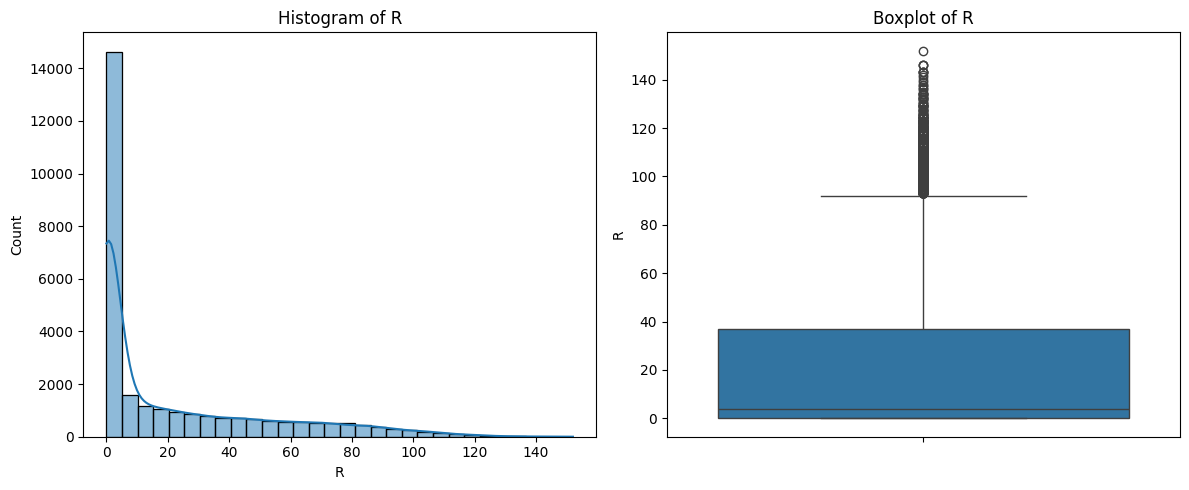

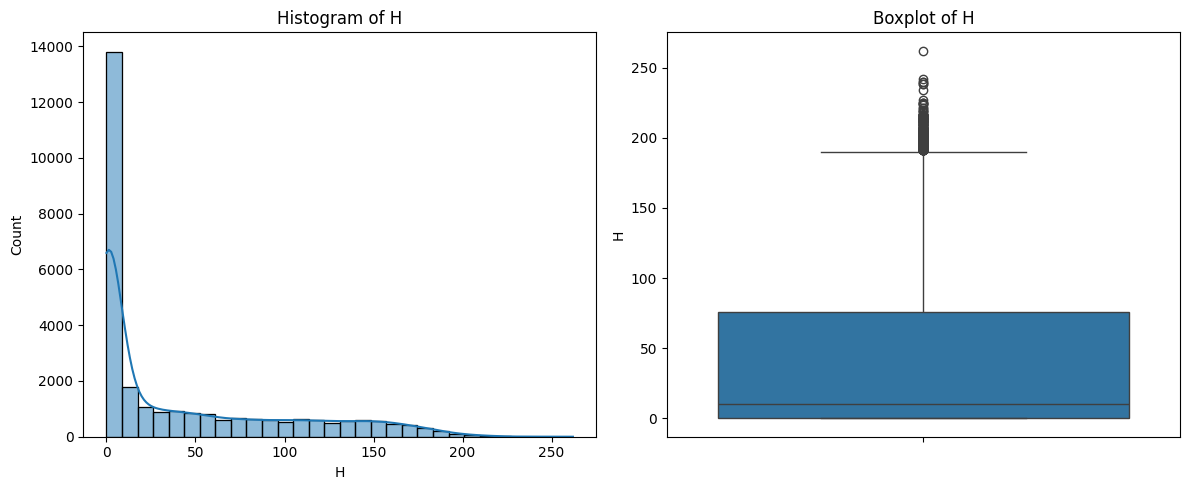

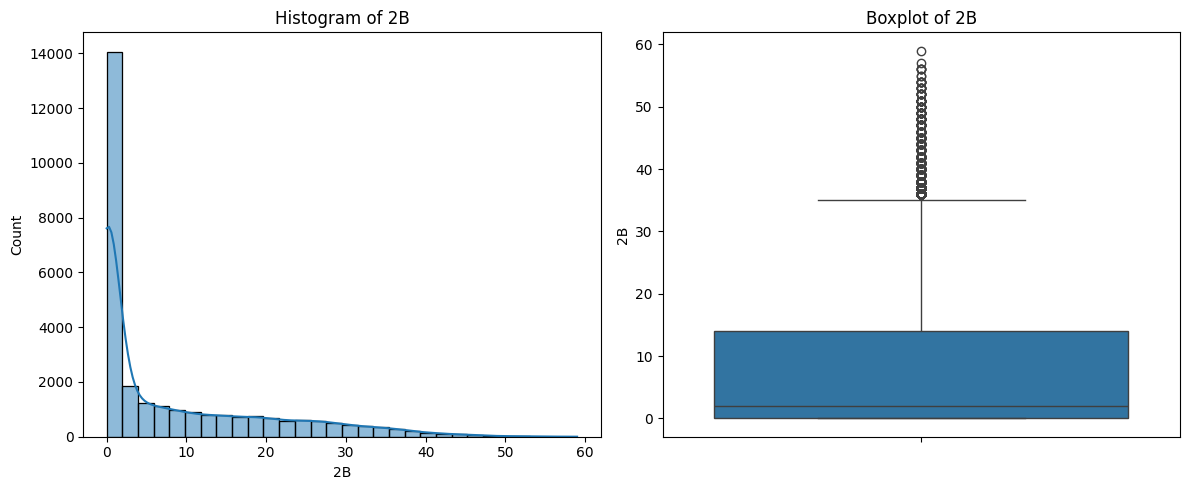

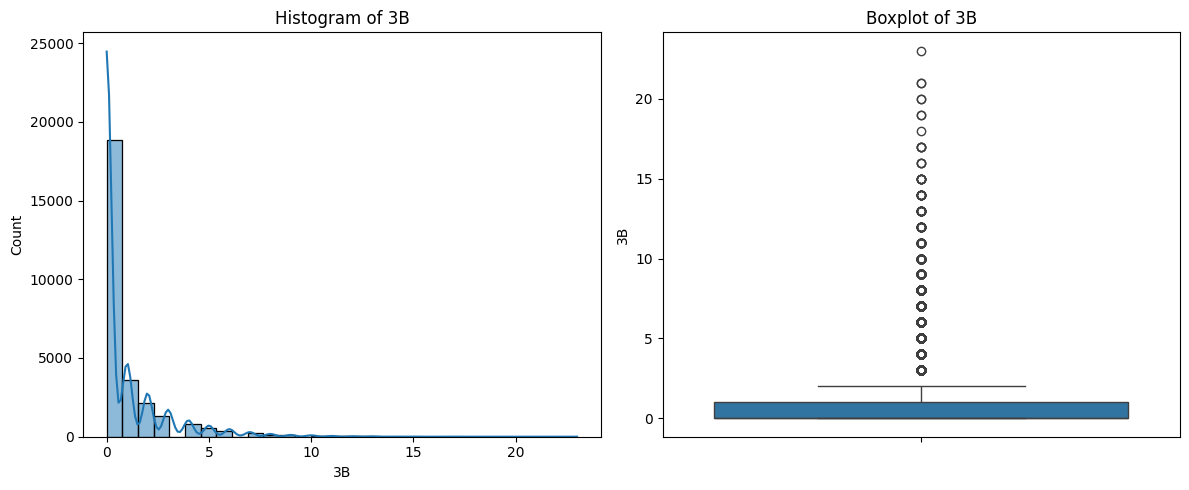

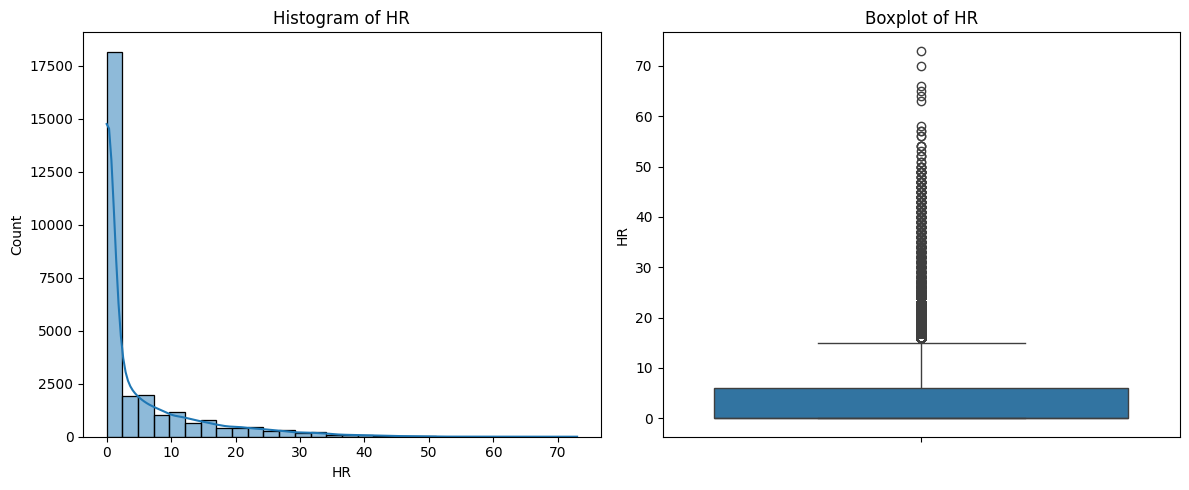

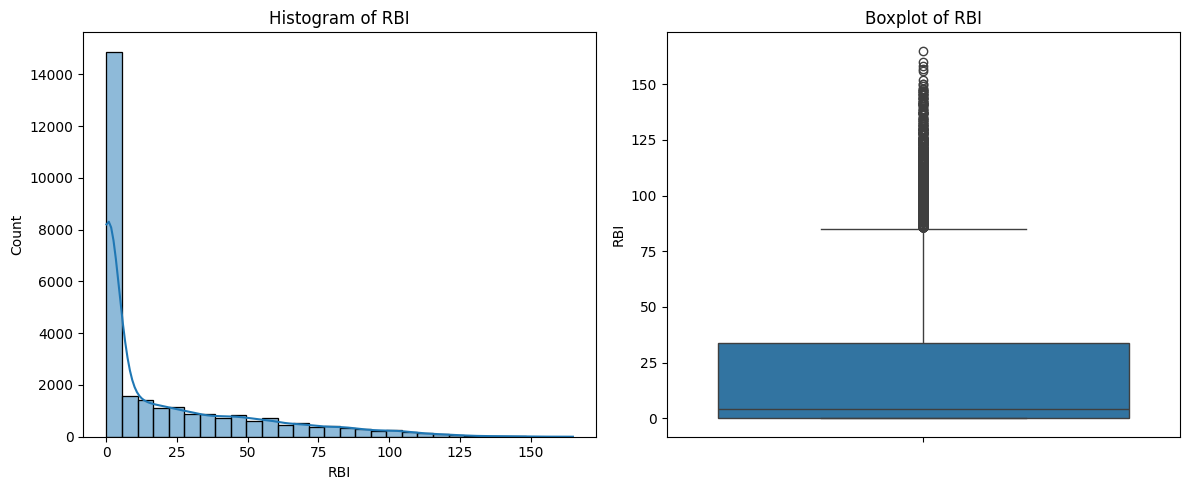

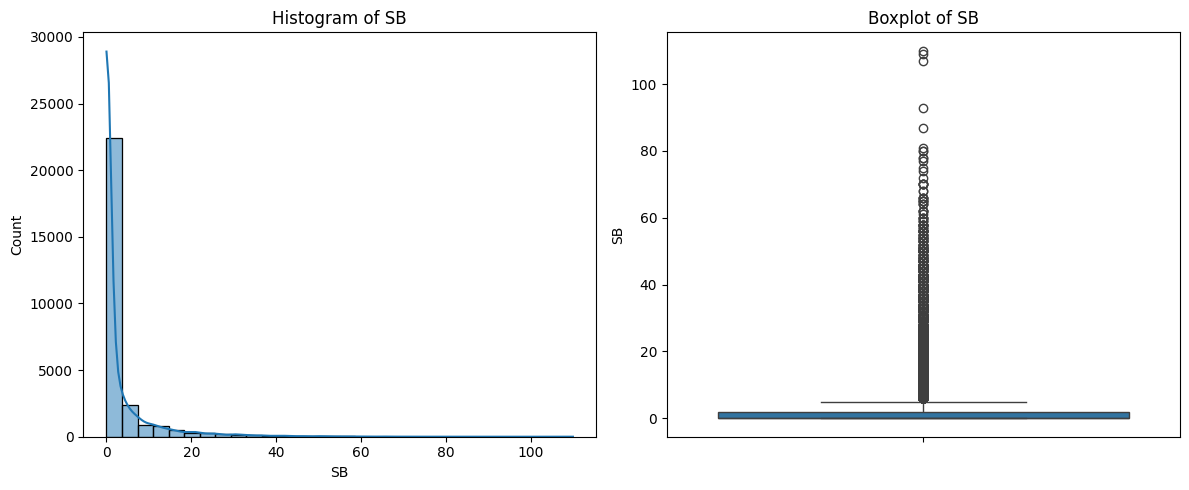

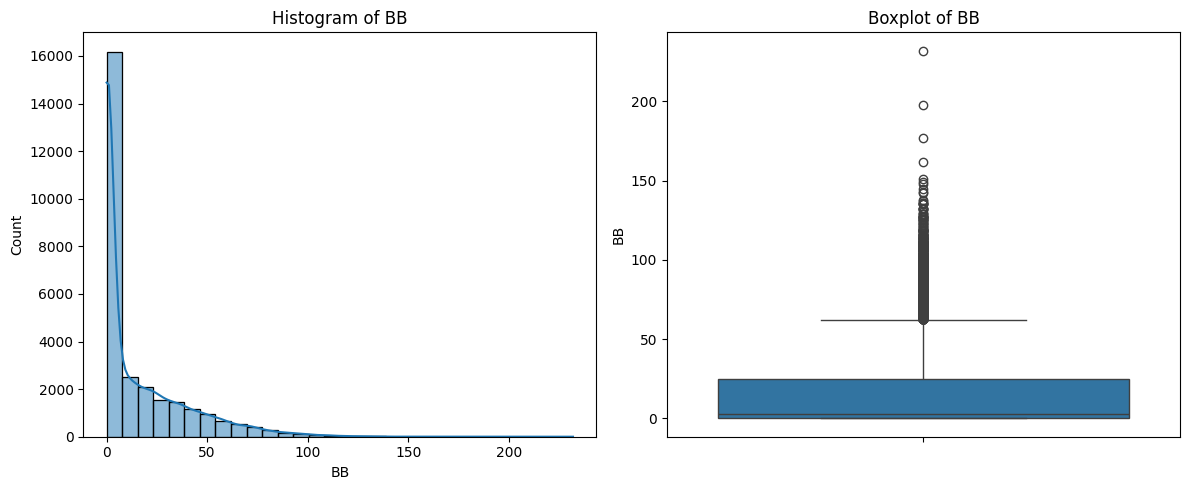

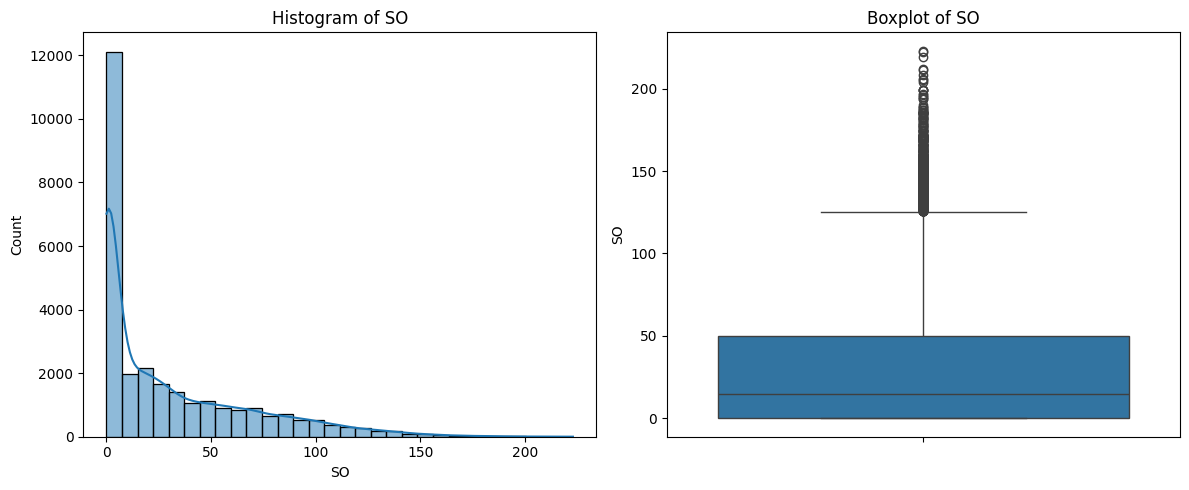

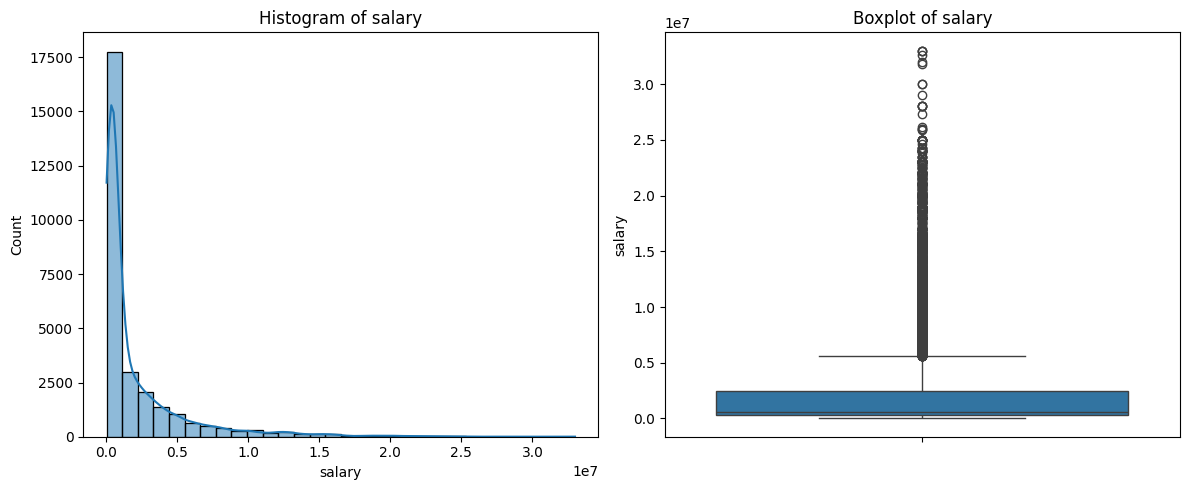

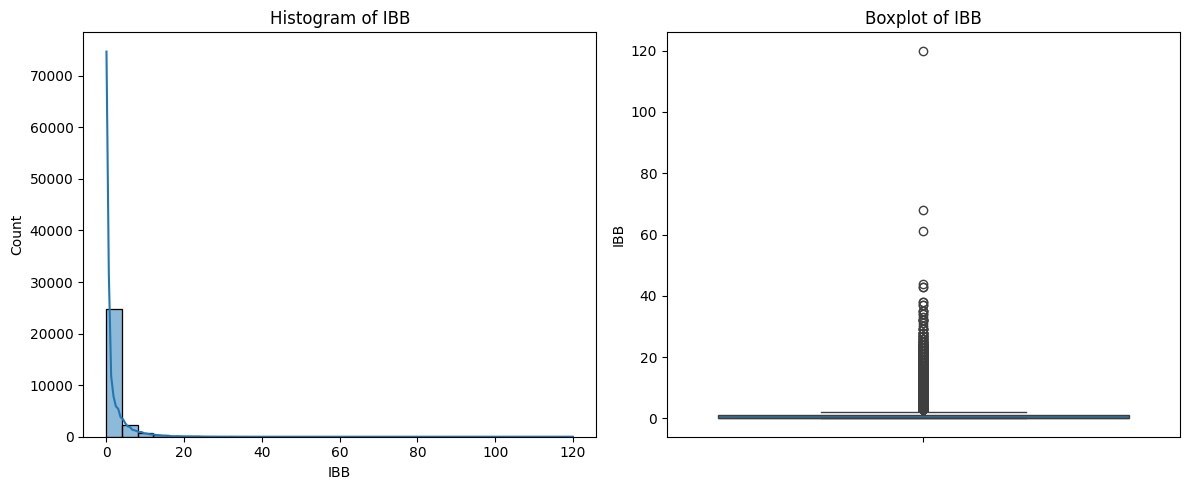

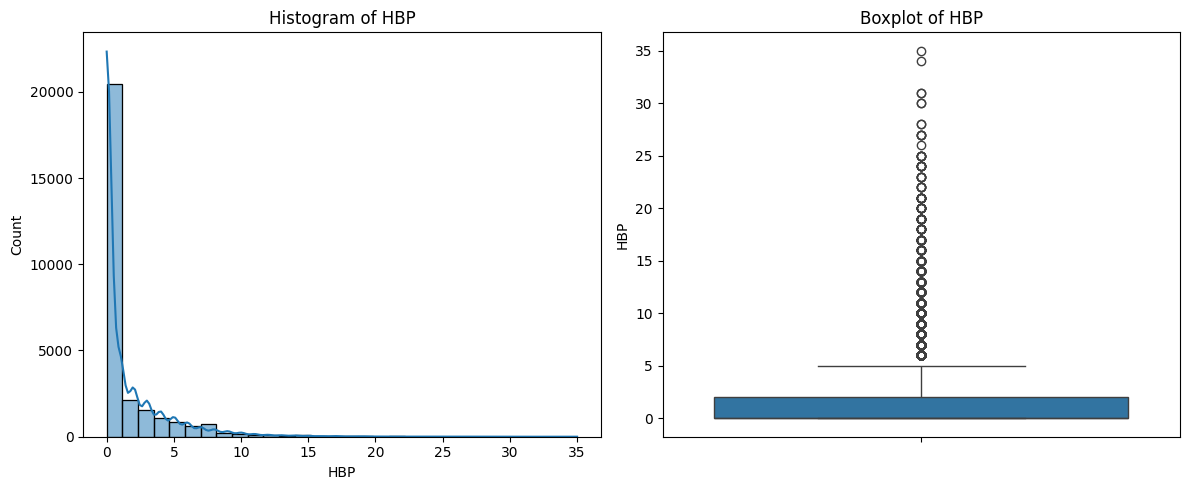

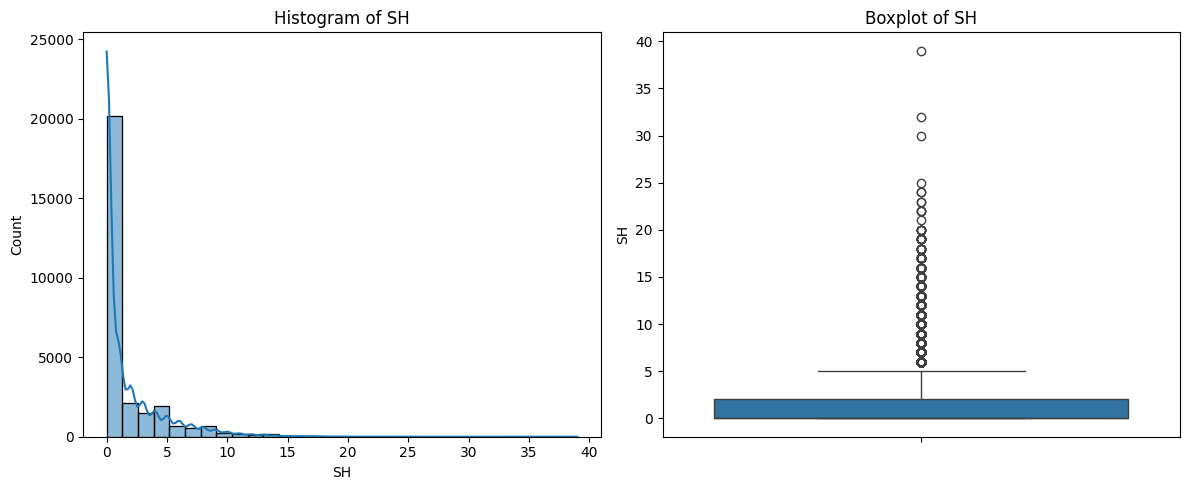

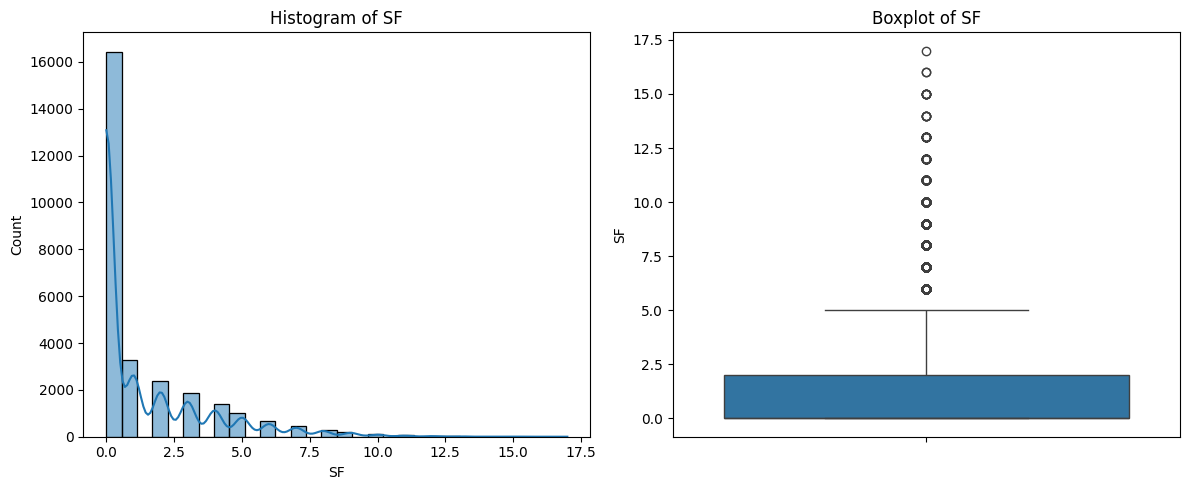

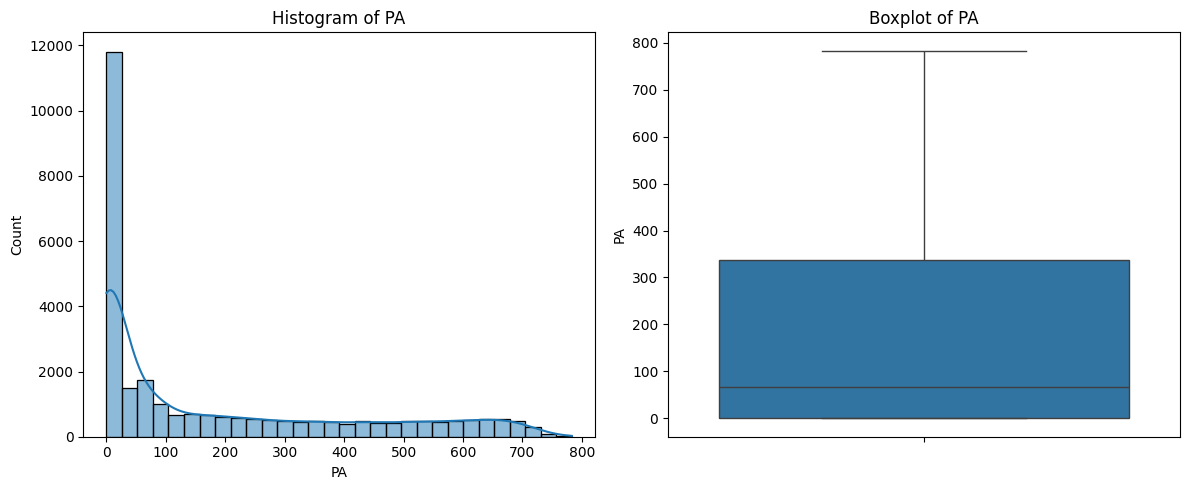

In [9]:
# Generate histograms and boxplots for all numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    if col not in ['index', 'Season']:  # Exclude non-relevant columns
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')

        # Show plots
        plt.tight_layout()
        plt.show()

Index was excluded from above as it has no analytical value. Seasons were also not included as they do not directly impact performance or salary in a single season context.

#### 3.1.3.3. <a id='toc3_1_3_3_'></a>[Key Findings](#toc0_)

- Salary is positively correlated with performance metrics like Games Played (G), Hits (H), Home Runs (HR), and Runs Batted In (RBI).
- Strikeouts (SO) and Walks (BB) also impact salary, indicating that batting discipline and power contribute to earnings.
- Stolen Bases (SB) has a weaker correlation, suggesting speed is not a major determinant of salary.
- The salary distribution is highly skewed, showing significant disparity between average and top-paid players.
- Boxplots reveal outliers, particularly in salary and performance stats, which could be further analyzed.

## 3.2. <a id='toc3_2_'></a>[Reflection on EDA](#toc0_)

### 3.2.1. <a id='toc3_2_1_'></a>[Will we be able to answer the questions we want to answer with the data we have?](#toc0_)
Yes, the dataset includes player performance metrics and salary information, which align with our goal of identifying the performance metrics that influence salary outcomes in Major League Baseball.  
- The correlation analysis confirms that key performance metrics such as Home Runs (HR), Runs Batted In (RBI), Hits (H), and Games Played (G) have a relationship with salary.  

### 3.2.2. <a id='toc3_2_2_'></a>[What visualizations are especially useful for explaining my data?](#toc0_)
- Correlation Matrix: Clearly identifies the strongest relationships between performance metrics and salary.
- Histograms: Show the skewed nature of salary and performance distributions, indicating that a small number of players have significantly higher salaries and stats.
- Boxplots: Highlight outliers, particularly in salary, confirming a large disparity between the highest-paid and average players.

### 3.2.3. <a id='toc3_2_3_'></a>[Do we need to adjust the data and/or driving questions?](#toc0_)
The dataset is sufficient for analyzing the relationship between salary and performance. While some features are highly skewed, the main question regarding the relationship between salary and performance can be answered. Salary outliers are present and could impact conclusions, however they are genuine data points rather than errors.

### 3.2.4. <a id='toc3_2_4_'></a>[Do we need to adjust our model/evaluation choices?](#toc0_)
The major adjustment the Exploratory Data Analysis has found is that we will need to adjust our models to predict the performance metrics for players to focus on rather than give salary predictions based on player performance. Additionally, although there are skewness and outliers present in several features, our conclusions will focus solely on performance-based factors, helping determine the important performance metrics for players to focus on. This will ensure that salary increases influenced by external factors beyond this analysis are not misattributed to player performance alone.

### 3.2.5. <a id='toc3_2_5_'></a>[Are our original expectations still reasonable?](#toc0_)
Yes, the data supports the expectation that strong performance correlates with higher salaries. However, salary is influenced by more than just performance metrics, with external factors likely contributing to the variance. The salary distribution reveals a small group of extremely high earners, while most players fall into a lower range. Given the structure of professional sports contracts, the presence of salary outliers is expected.

# 4. <a id='toc4_'></a>[Milestone Four](#toc0_)


## 4.1. <a id='toc4_1_'></a>[Data Preparation](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>[Data Cleaning](#toc0_)

For details regarding data cleaning, please refer to [3.1.2.3 Findings](#toc3_1_2_3_).

### 4.1.2. <a id='toc4_1_2_'></a>[Data Splitting for Training](#toc0_)

In [10]:
features = ["G", "AB", "R", "2B", "3B", "HR", "RBI", "SB", "BB", "SO", "IBB", "HBP", "SH", "SF", "PA"]
target = "salary"

x = data[features]
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

To prepare the data for Machine Learning models, a sub set of the data is extracted and split into training and testing sets. This subset includes only the player performance metrics (variable X) and salary (variable Y). The extracted datasets are split into 2 sections, 80% for training and 20% for testing. An additional step was done for the Stepwise Model. Please refer to [4.2.2.1 Create the Feature Selection Function](#toc4_2_2_1_).

## 4.2. <a id='toc4_2_'></a>[Models](#toc0_)

### 4.2.1. <a id='toc4_2_1_'></a>[Linear Regression Model](#toc0_)

#### 4.2.1.1. <a id='toc4_2_1_1_'></a>[Train the model](#toc0_)

In [11]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

#### 4.2.1.2. <a id='toc4_2_1_2_'></a>[Evaluate the Model](#toc0_)

In [12]:
y_pred = lr_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"""
Linear Regression:
MAE: {mae}
MSE: {mse}
RMSE: {rmse}
R²: {r2}
Accuracy Score (R²): {r2 * 100:.2f}%
""")


Linear Regression:
MAE: 2118214.4379235418
MSE: 11152647964002.691
RMSE: 3339558.04920392
R²: 0.10528422240349589
Accuracy Score (R²): 10.53%



#### 4.2.1.3. <a id='toc4_2_1_3_'></a>[Findings](#toc0_)

The model explains `~ 10.53%` of the variance (R²) in player salaries. The model is off by `~ $2.1 Million` (MAE) and the typical prediction error is `~ $3.3 Million` (RMSE). 

### 4.2.2. <a id='toc4_2_2_'></a>[Stepwise Regression](#toc0_)

#### 4.2.2.1. <a id='toc4_2_2_1_'></a>[Create the Feature Selection Function](#toc0_)

In [ ]:
def stepwise_selection(x, y, threshold_in=0.05, threshold_out = 0.1):
    included = []

    while True:
        changed = False
        excluded = list(set(x.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        
        # Try adding each excluded feature
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(x[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        # Find the best new feature to add
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Check if we need to remove any feature
        model = sm.OLS(y, sm.add_constant(x[included])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    return included

#### 4.2.2.2. <a id='toc4_2_2_2_'></a>[Train the Model](#toc0_)

In [14]:
selected_features = stepwise_selection(x_train, y_train)

x_train_stepwise = x_train[selected_features]
x_test_stepwise = x_test[selected_features]

stepwise_model = LinearRegression()
stepwise_model.fit(x_train_stepwise, y_train)

LinearRegression()

#### 4.2.2.3. <a id='toc4_2_2_3_'></a>[Evaluate the Model](#toc0_)

In [15]:
y_pred_stepwise = stepwise_model.predict(x_test_stepwise)


mae_stepwise = mean_absolute_error(y_test, y_pred_stepwise)
mse_stepwise = mean_squared_error(y_test, y_pred_stepwise)
rmse_stepwise = np.sqrt(mse_stepwise)
r2_stepwise = r2_score(y_test, y_pred_stepwise)

# Display Results
print(f"""
Stepwise Regression:
MAE: {mae_stepwise}
MSE: {mse_stepwise}
RMSE: {rmse_stepwise}
R²: {r2_stepwise}
Accuracy Score (R²): {r2_stepwise * 100:.2f}%
""")



Stepwise Regression:
MAE: 2117753.6377090174
MSE: 11146015931036.326
RMSE: 3338564.950848841
R²: 0.10581627403389793
Accuracy Score (R²): 10.58%



#### 4.2.2.4. <a id='toc4_2_2_4_'></a>[Findings](#toc0_)

The model performs only marginally better than the Linear Regression model.

The model explains `~ 10.58%` of the variance (R²) in player salaries. The model is off by `~ $2.1 Million` (MAE) and the typical prediction error is `~ $3.3 Million` (RMSE). 

### 4.2.3. <a id='toc4_2_3_'></a>[Random Forest Model](#toc0_)

#### 4.2.3.1. <a id='toc4_2_3_1_'></a>[Train the Model](#toc0_)

In [16]:
rf_model = RandomForestRegressor(random_state=11)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=11)

#### 4.2.3.2. <a id='toc4_2_3_2_'></a>[Evaluate the Model](#toc0_)

In [17]:
y_pred_rf = rf_model.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# Display Results
print(f"""
Random Forest:
MAE: {mae_rf}
MSE: {mse_rf}
RMSE: {rmse_rf}
R²: {r2_rf}
Accuracy Score (R²): {r2_rf * 100:.2f}%
""")


Random Forest:
MAE: 2062802.5838251298
MSE: 10933223411448.154
RMSE: 3306542.5162015012
R²: 0.12288745078443886
Accuracy Score (R²): 12.29%



#### 4.2.3.3. <a id='toc4_2_3_3_'></a>[Findings](#toc0_)

The model performs slightly better than both the Linear Regression and Stepwise Regression Models.

The model explains `~ 12.64%` of the variance (R²) in player salaries. The model is off by `~ $2 Million` (MAE) and the typical prediction error is `~ $3.2 Million` (RMSE). 

### 4.2.4. <a id='toc4_2_4_'></a>[Polynomial Regression](#toc0_)

#### 4.2.4.1. <a id='toc4_2_4_1_'></a>[Train the Model](#toc0_)

In [18]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

#### 4.2.4.2. <a id='toc4_2_4_2_'></a>[Evaluate the Model](#toc0_)

In [19]:
y_pred_poly = poly_model.predict(x_test)


mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


# Display Results
print(f"""
Polynomial Regression:
MAE: {mae_poly}
MSE: {mse_poly}
RMSE: {rmse_poly}
R²: {r2_poly}
Accuracy Score (R²): {r2_poly * 100:.2f}%
""")


Polynomial Regression:
MAE: 2028968.041652307
MSE: 10327067134213.11
RMSE: 3213575.4439896243
R²: 0.1715160443419378
Accuracy Score (R²): 17.15%



#### 4.2.4.3. <a id='toc4_2_4_3_'></a>[Findings](#toc0_)

The model's R² score noticeably improved over the previous models. The model explains `~ 17.15%` of the variance in player salaries. However, the model is off by `~ $2 Million` (MAE) and the typical prediction error is `~ $3.2 Million` (RMSE). While the R² score seems to have substantially improved, the MAE and RMSE are similar to the Regression and Random Forest models, indicating model overfitting.

### 4.2.5. <a id='toc4_2_5_'></a>[Model Findings](#toc0_)

The models have shown that player performance metrics play a role of less than `20%` in players' salary determination. While the metrics have a small role in the salary determination, they are still a fairly significant player for player salaries. The models have shown the ability to recommend the metrics most important for best player salary determination.

The following is the summary of statistical findings for all models. The Linear Regression model (for which no preprocessing was completed) explains `~ 10.53%` of variance in player salary, while being off at `~ $2.1 Million` with a typical prediction error rate of `~ $3.3 Million`. The Stepwise Regression model explains `~ 10.58%` of variance, while being off at `~ $2.1 Million` and a typical error rate of `~ $3.3 Million`, an ever slight improvement of variance coverage over the Linear Regression model. The Random Forest Model explains `~ 12.29%` of variance, while being off at `~ $2 Million` and a typical error rate of `~ $3.3 Million`, a slightly better improvement over the Stepwise Regression Model. The Polynomial Model explains `~17.15%` of the variance, while being off at `~ $2 Million` and a typical error rate of `~ $3.2 Million`. While the Polynomial Model shows a significant increase in variance coverage, the error rates have not improved, indicating model overfitting. 

Due to the findings above, the metric importance will be determined using the Stepwise Regression and Random Forest models. As the Random Forest model proved to have a better variance coverage, it's results should be prioritized over the Stepwise Regression Model.

## 4.3. <a id='toc4_3_'></a>[Recommendations](#toc0_)

### 4.3.1. <a id='toc4_3_1_'></a>[Most Important Player Performance Metrics](#toc0_)

#### 4.3.1.1. <a id='toc4_3_1_1_'></a>[Random Forest Recommendations](#toc0_)

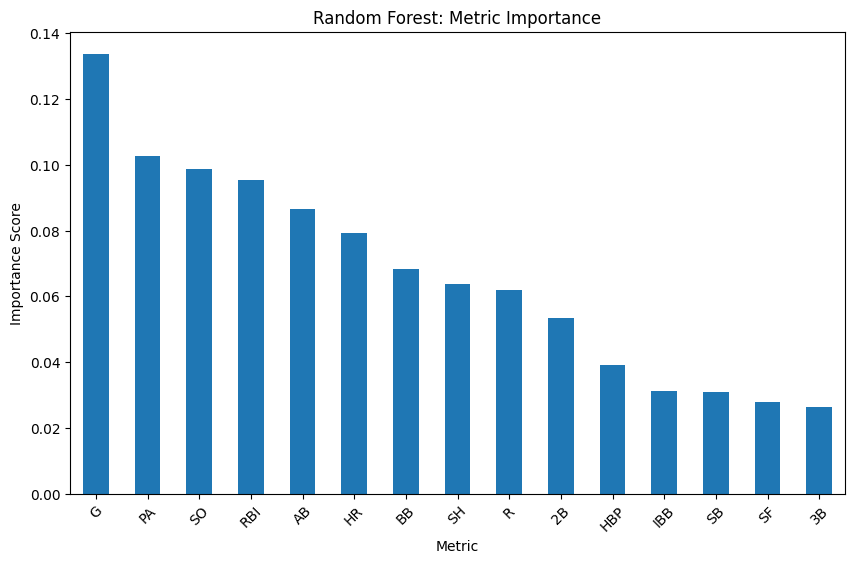

In [20]:
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind="bar")
plt.title("Random Forest: Metric Importance")
plt.xlabel("Metric")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

The **Random Forest Model** selected the following <u>top 5 features</u>:
1. **G:** Number of games played by the player during the season.
2. **PA:** Number Of Platements Participated over Entire Game Duration.
3. **SO:** Number of strikeouts by the player during the season. 
4. **RBI:** Number of runs batted in by the player during the season.
5. **AB:** Number of at-bats by the player during the season.

#### 4.3.1.2. <a id='toc4_3_1_2_'></a>[Stepwise Regression Recommendations](#toc0_)

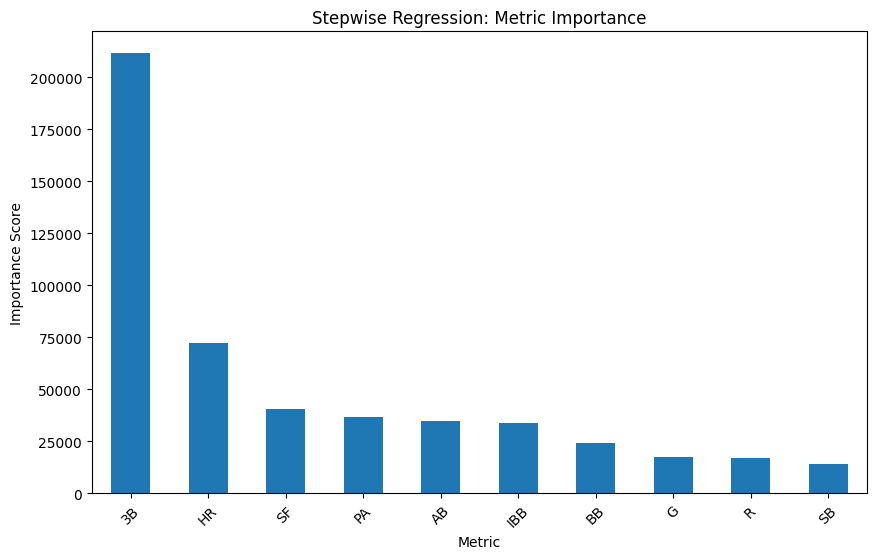

In [21]:
feature_importance_stepwise = pd.Series(np.abs(stepwise_model.coef_), index=x_train_stepwise.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_stepwise.plot(kind="bar")
plt.title("Stepwise Regression: Metric Importance")
plt.xlabel("Metric")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

The **Stepwise Regression Model** selected the following <u>top 5 features</u>:

1. **3B:** Number of triples hit by the player during the season.
2. **HR:** Number of home runs hit by the player during the season.
3. **SF:** Total number of Sacrifice Flies done thus far.
4. **PA:** Number Of Platements Participated over Entire Game Duration. 
5. **AB:** Number of at-bats by the player during the season.

## 4.4. <a id='toc4_4_'></a>[Conclusion](#toc0_)

The best performing models have selected the following player performance metrics as the top 5 (ordered from highest to lowest) that most affect player salaries:

1. Number of games played by the player during the season.
2. Number Of Platements Participated over Entire Game Duration.
3. Number of strikeouts by the player during the season. 
4. Number of runs batted in by the player during the season.
5. Number of at-bats by the player during the season.

Additionally, a supplementary performance set was also generated:

1. Number of triples hit by the player during the season.
2. Number of home runs hit by the player during the season.
3. Total number of Sacrifice Flies done thus far.
4. Number Of Platements Participated over Entire Game Duration. 
5. Number of at-bats by the player during the season.

For most players, the first set should suffice. For best results, players should use the second set as a supplementary set to the first.

## 4.5. <a id='toc4_5_'></a>[Additional Information](#toc0_)

### 4.5.1. <a id='toc4_5_1_'></a>[Project Ethical Considerations](#toc0_)

There have been no ethical or legal considerations found during the project. The data has been sources from an open and publicly accessible source. For more information, please refer to [2.1.3 Source](#toc2_1_3_).